# Pandas Movies Data Analysis Project

In [170]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
movies = pd.read_csv('movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [172]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
movieId    45843 non-null int64
title      45843 non-null object
genres     45843 non-null object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [173]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Creating new year and title features

In [174]:
movies['year'] = movies['title'].apply(lambda x: re.findall('\(\d+\)$', x))

In [175]:
movies['title'] = movies['title'].apply(lambda x: re.sub(r'\(\d+\)$', '', x))

In [176]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,[(1995)]
1,2,Jumanji,Adventure|Children|Fantasy,[(1995)]
2,3,Grumpier Old Men,Comedy|Romance,[(1995)]
3,4,Waiting to Exhale,Comedy|Drama|Romance,[(1995)]
4,5,Father of the Bride Part II,Comedy,[(1995)]


# Checking if a movie has no year value

In [177]:
#noyears = movies.index.values[np.where(movies.year.apply(lambda x: ''.join(x)).apply(lambda x: x[1:5]) == '')]
#noyears
noyears = np.where(movies.year.apply(lambda x: len(x)==0))
print(noyears)

(array([ 8495,  8635,  8962,  9171,  9233,  9688,  9781,  9929, 10018,
       10047, 10173, 10237, 10607, 10861, 11722, 11771, 11888, 11917,
       12213, 12527, 12583, 12883, 12915, 15690, 15845, 15846, 15847,
       15857, 16414, 16680, 16780, 16814, 16947, 16983, 17063, 17209,
       17225, 17303, 17304, 17308, 17354, 17362, 17397, 17434, 17450,
       17555, 17640, 17641, 17642, 17768, 17778, 17792, 17852, 17935,
       17996, 18062, 18069, 18076, 18319, 18458, 18463, 18583, 18586,
       18598, 18630, 18699, 18724, 18780, 18883, 18896, 18993, 19019,
       19044, 19054, 19077, 19085, 19091, 19124, 19181, 19217, 19230,
       19287, 19301, 19306, 19310, 19358, 19407, 19409, 19445, 19450,
       19453, 19456, 19472, 19493, 19501, 19556, 19578, 19600, 19717,
       19768, 19947, 20051, 20117, 20162, 20202, 20436, 20477, 20494,
       20502, 20544, 20592, 20618, 20646, 20665, 20710, 20735, 20769,
       20797, 20798, 20816, 20863, 20954, 21008, 21109, 21223, 21224,
       21226, 21227

In [178]:
#np.array([]).astype('int64')
print(np.where(movies.year.apply(lambda x: len(x)>1)))

(array([], dtype=int64),)


In [179]:
ftotn = pd.DataFrame(movies.loc[43139])
ftsto = pd.DataFrame(movies.loc[42730])
ftotn

,43139
movieId,169656
title,The Glass Castle
genres,Drama
year,[]


In [180]:
ftsto

,42730
movieId,168730
title,Mumford & Sons: We Wrote This Yesterday
genres,(no genres listed)
year,[]


# Cleaning the year feature

In [181]:
def clean_year(x):
    if len(x) != 1:
        return np.nan
    else:
        return int(re.search(r'\d+', x[0]).group())

In [182]:
movies.year = movies.year.apply(clean_year)

In [183]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji,Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men,Comedy|Romance,1995.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II,Comedy,1995.0


# Cleaning the genres feature

In [184]:
def clean_genres(x):
    l = x.split('|')
    if len(l) == 0 or x=='(no genres listed)':
        return []
    return l        

In [185]:
movies.genres = movies.genres.apply(clean_genres)

In [186]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995.0
4,5,Father of the Bride Part II,[Comedy],1995.0


# Visualizing the years

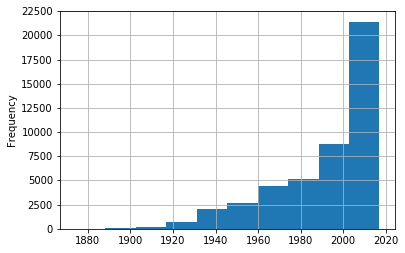

In [187]:
movies.year.plot(kind='hist', grid=True)

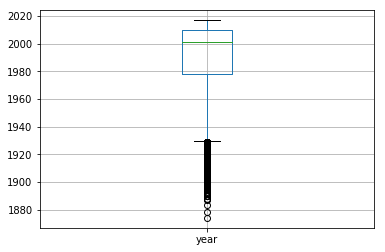

In [188]:
movies.year.plot(kind='box', grid=True)

# How many movies do not have a year value? Display the last 20

### Answer: 398

In [189]:
movies[movies.year.isnull()][379:399]

,movieId,title,genres,year
44333,172451,Irwin & Fran 2013,[],NaN
44385,172557,Shivering Trunks,[],NaN
44436,172673,Supermassive Black Holes,[Documentary],NaN
44469,172739,Игра на выбывание,[],NaN
44552,172915,Falling Skies,[],NaN
44669,173191,Neither Wolf Nor Dog,[Drama],NaN
44737,173347,Philosophy: A Guide to Happiness,[Documentary],NaN
45156,174447,A Gray State,[],NaN
45174,174485,Salad Fingers,[],NaN
45354,174953,Mundo Cão,[],NaN


# List Years in Descending and Titles in Ascending Orders

In [192]:
movies.sort_values(by=['year', 'title'], ascending=[False, True])

,movieId,title,genres,year
43587,170783,1 Mile to You,[],2017.0
45258,174679,1 Night,"[Drama, Romance]",2017.0
45332,174893,2:22,"[Drama, Thriller]",2017.0
43656,170941,3 Idiotas,[],2017.0
45382,175151,78/52,[Documentary],2017.0
45336,174901,A Bag of Marbles,[Drama],2017.0
42295,167640,A Cure for Wellness,"[Drama, Horror, Mystery, Thriller]",2017.0
43867,171439,A Dark Song,"[Drama, Horror]",2017.0
42178,167380,A Dog's Purpose,"[Comedy, Drama]",2017.0
44499,172807,A Family Man,[Drama],2017.0


# Getting Movie Counts by Genre and Plotting

In [194]:
movies.movieId.is_unique

True

In [195]:
movies.title.is_unique

False

In [224]:
count = movies.genres.value_counts()
count

AttributeError: 'Series' object has no attribute 'count_values'

In [202]:
count.plot(kind='bar')

AttributeError: 'function' object has no attribute 'plot'